In [ ]:
!nvidia-smi

Sun Jan 26 14:30:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Data https://dane.gov.pl/dataset/397,rejestr-produktow-leczniczych

# Please select: Runtime/ Change runtime type / GPU

(in colab it is not enought  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') )

In [ ]:
!pip install livelossplot

In [ ]:
!pip install unidecode

     |████████████████████████████████| 245kB 3.4MB/s 


In [ ]:
import pandas as pd 
import xml.etree.ElementTree as et 

In [ ]:

import numpy as np
import pandas as pd
from collections import Counter
from unidecode import unidecode
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
from livelossplot import PlotLosses
from torch.utils.data.sampler import SubsetRandomSampler

# Import xml

https://stackabuse.com/reading-and-writing-xml-files-in-python/

https://medium.com/@robertopreste/from-xml-to-pandas-dataframes-9292980b1c1c

# Import and data cleaning

In [ ]:
tree = et.parse('Pobieranie.ashx')

In [ ]:
root = tree.getroot()

In [ ]:
print(root[50].attrib)

{'nazwaProduktu': 'Abaktal', 'rodzajPreparatu': 'ludzki', 'nazwaPowszechnieStosowana': 'Pefloxacinum', 'moc': '400 mg', 'postac': 'tabletki powlekane', 'podmiotOdpowiedzielny': 'Sandoz GmbH', 'typProcedury': 'NAR', 'numerPozwolenia': '00617', 'waznoscPozwolenia': 'Bezterminowe', 'kodATC': 'J01MA03', 'id': '201'}


In [ ]:
print(root[50].attrib['nazwaProduktu'])

Abaktal


In [ ]:
print(root[50].attrib['nazwaPowszechnieStosowana'])

Pefloxacinum


In [ ]:
print(root[0].attrib['nazwaProduktu'])

Zoledronic acid Fresenius Kabi


In [ ]:
print(root[0].attrib['nazwaPowszechnieStosowana'])

Acidum zoledronicum


In [ ]:
print(len(root[0].attrib['nazwaProduktu']))

30


In [ ]:
drugs=[]
for node in root: 
  drugs.append(node.attrib.get('nazwaProduktu'))

In [ ]:
print(len(drugs))

18694


In [ ]:
drugs[0]

'Zoledronic acid Fresenius Kabi'

In [ ]:
drugs[0][3]

'e'

In [ ]:
print(len(drugs[0]))

30


In [ ]:
drugs[50]

'Abaktal'

In [ ]:
drugs_df = pd.DataFrame(drugs,columns=['title'])

In [ ]:
drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18694 entries, 0 to 18693
Data columns (total 1 columns):
title    18694 non-null object
dtypes: object(1)
memory usage: 146.2+ KB


In [ ]:
pd.isnull(drugs_df).sum()

title    0
dtype: int64

In [ ]:
drugs_df.describe()

,title
count,18694
unique,9427
top,Betaserc
freq,51


In [ ]:
drugs_df = pd.DataFrame(drugs_df['title'].unique(),columns=['title'])

In [ ]:
drugs_df.describe()

,title
count,9427
unique,9427
top,Candesartan HCT Tchaikapharma
freq,1


In [ ]:
max(drugs_df['title'].apply(len))

124

In [ ]:
drugs_df['len']=drugs_df['title'].apply(len)

In [ ]:
drugs_df['len'].value_counts()

8      1153
7      1109
9       729
10      569
6       542
       ... 
107       1
83        1
102       1
105       1
95        1
Name: len, Length: 99, dtype: int64

In [ ]:
max(drugs_df['title'].str.count(' '))

18

In [ ]:
drugs_df['word_num']=drugs_df['title'].str.count(' ')+1

In [ ]:
drugs_df.describe()

,len,word_num
count,9427.000000,9427.000000
mean,15.303490,2.241858
std,12.371961,2.020701
min,3.000000,1.000000
25%,8.000000,1.000000
50%,11.000000,2.000000
75%,18.000000,2.000000
max,124.000000,19.000000


In [ ]:
drugs_df.sort_values('len', ascending=False)

,title,len,word_num
6195,"Pederipra Spray, 20mg/ml, zawiesina do natrysk...",124,19
7912,Pneumospectin 50/100 mg/ml roztwór do wstrzyk...,107,17
5501,"Rispoval IBR-Marker Vivum, liofilizat i rozpus...",105,13
5514,"Rispoval 3 - BRSV - PI3 - BVD, liofilizat i za...",104,18
4773,Tilmovet 250 mg/ml koncentrat do sporządzania ...,104,15
...,...,...,...
52,ACC,3,1
3418,L52,3,1
4168,Yaz,3,1
4647,MIG,3,1


In [ ]:
drugs_df.sort_values('word_num', ascending=False)

,title,len,word_num
6195,"Pederipra Spray, 20mg/ml, zawiesina do natrysk...",124,19
6275,"Foresto 1,25 g + 0,56 g obroża dla kotów i psó...",83,19
5514,"Rispoval 3 - BRSV - PI3 - BVD, liofilizat i za...",104,18
7912,Pneumospectin 50/100 mg/ml roztwór do wstrzyk...,107,17
6272,"Foresto 1,25 g + 0,56 g obroża dla psów o masi...",79,17
...,...,...,...
4283,Gleptosil,9,1
4271,Mycamine,8,1
4258,Ladybon,7,1
4242,Suramox,7,1


In [ ]:
drugs_df['word_num'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1])

0.00     1.0
0.10     1.0
0.20     1.0
0.30     1.0
0.40     1.0
0.50     2.0
0.60     2.0
0.70     2.0
0.80     3.0
0.90     4.0
0.95     6.0
0.96     7.0
0.97     8.0
0.98    10.0
0.99    11.0
1.00    19.0
Name: word_num, dtype: float64

In [ ]:
drugs_df[drugs_df['word_num']>10].sum

<bound method DataFrame.sum of                                                   title  len  word_num
1877  Doxyhyklan 40, 400 mg/g, proszek do podawania ...   78        15
1980  Rifen 100 mg/ml roztwór do wstrzykiwań dla kon...   61        11
2257  Maasol - Zestaw do sporządzania makroagregatów...   89        11
3731  Denagard 10% premiks do sporządzania paszy lec...   87        13
3733  Domosedan 10 mg/1 ml, roztwór do wstrzykiwań d...   61        11
...                                                 ...  ...       ...
9162                      Gallivac IB88 Neo               29        15
9287  Nobilis IB 4 - 91, liofilizat do sporządzania ...   67        11
9391  Sedadex 0,1 mg/ml roztwór do wstrzykiwa ń  dla...   60        13
9392  Sedadex 0,5 mg/ml roztwór do wstrzykiwa ń  dla...   60        13
9414  Sevohale 100% v/v  płyn do sporządzania inhala...   66        11

[134 rows x 3 columns]>

In [ ]:
drugs_df[drugs_df['word_num']>10]

,title,len,word_num
1877,"Doxyhyklan 40, 400 mg/g, proszek do podawania ...",78,15
1980,Rifen 100 mg/ml roztwór do wstrzykiwań dla kon...,61,11
2257,Maasol - Zestaw do sporządzania makroagregatów...,89,11
3731,Denagard 10% premiks do sporządzania paszy lec...,87,13
3733,"Domosedan 10 mg/1 ml, roztwór do wstrzykiwań d...",61,11
...,...,...,...
9162,Gallivac IB88 Neo,29,15
9287,"Nobilis IB 4 - 91, liofilizat do sporządzania ...",67,11
9391,"Sedadex 0,1 mg/ml roztwór do wstrzykiwa ń dla...",60,13
9392,"Sedadex 0,5 mg/ml roztwór do wstrzykiwa ń dla...",60,13


In [ ]:
drugs_df[(drugs_df['word_num']>5)&(drugs_df['word_num']<=10)]

,title,len,word_num
496,Tempora 100 mg tabletki do rozgryzania i żucia...,55,10
619,Ibufen dla dzieci o smaku malinowym,35,6
634,"Injectio Glucosi 5% et Natrii chlorati 0,9% 1...",55,10
635,"Injectio Glucosi 5% et Natrii chlorati 0,9% 2:...",54,9
655,"Jodek sodu, Na 131 I Polatom do terapii",40,9
...,...,...,...
9254,Contacera 15 mg/ml zawiesina doustna dla koni,45,7
9301,"ERAVAC, emulsja do wstrzykiwań dla królików",43,6
9369,"Dindoral, liofilizat dla indyków i bażantów",43,6
9390,"HALAGON 0,5 mg/ml roztwór doustny dla cieląt",44,7


In [ ]:
drugs_df[(drugs_df['word_num']==5)]

,title,len,word_num
20,Flegamina Junior o smaku truskawkowym,37,5
40,Coffepirine Tabletki od bólu głowy,34,5
267,Calcium Aflofarm (o smaku bananowym),36,5
275,Calcium Sandoz + Vitamin C,26,5
393,10% Dekstran 40 000 Fresenius,29,5
...,...,...,...
9225,Pandemic influenza vaccine H5N1 MedImmune,41,5
9244,Drospirenone + Ethinylestradiol Midas Pharma,44,5
9260,Alendronic acid + Colecalciferol Sandoz,39,5
9297,Strepsils truskawkowy bez cukru,32,5


## Założenie 1

Wnioskuję, że długie nazwy wynikają z tego, że ktoś błędnie wpisuje w komórkę z nazwą też sposób użycia lub inne informacje. Aby pozbawić się tej niewłaściwej informacji i na podstawie krótkiej analizy danych, zakładam, że nazwa nie może być dłuższa niż 4 słowa. (oczywiście można poświęcić więcej czasu i zrobić to lepiej).

In [ ]:
df=drugs_df

In [ ]:
print(df.title.apply(lambda x: pd.Series(str(x).split(" ")))) 

              0      1          2     3    4   ...   14   15   16   17   18
0     Zoledronic   acid  Fresenius  Kabi  NaN  ...  NaN  NaN  NaN  NaN  NaN
1         Edelan    NaN        NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN
2       Nalgesin    NaN        NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN
3       Nalgesin  Forte        NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN
4      Diprobase    NaN        NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN
...          ...    ...        ...   ...  ...  ...  ...  ...  ...  ...  ...
9422  Cunibiovac    RHD        NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN
9423    Pracetam    NaN        NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN
9424      Amodip    NaN        NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN
9425      Adaxio    NaN        NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN
9426   Coldostin    NaN        NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN

[9427 rows x 19 columns]


In [ ]:
df2 = df.title.apply(lambda x: pd.Series(str(x).split(" ")))

In [ ]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Zoledronic,acid,Fresenius,Kabi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Edelan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nalgesin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nalgesin,Forte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Diprobase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9422,Cunibiovac,RHD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9423,Pracetam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9424,Amodip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9425,Adaxio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['title_new'] = df2[df2.columns[0:4]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

In [ ]:
df['len_new']=df['title_new'].apply(len)

In [ ]:
df['word_num_new']=df['title_new'].str.count(' ')+1

In [ ]:
df.describe()

,len,word_num,len_new,word_num_new
count,9427.000000,9427.000000,9427.000000,9427.000000
mean,15.303490,2.241858,13.400870,1.928079
std,12.371961,2.020701,6.859569,1.002079
min,3.000000,1.000000,3.000000,1.000000
25%,8.000000,1.000000,8.000000,1.000000
50%,11.000000,2.000000,11.000000,2.000000
75%,18.000000,2.000000,18.000000,2.000000
max,124.000000,19.000000,55.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9427 entries, 0 to 9426
Data columns (total 6 columns):
title           9427 non-null object
len             9427 non-null int64
word_num        9427 non-null int64
title_new       9427 non-null object
len_new         9427 non-null int64
word_num_new    9427 non-null int64
dtypes: int64(4), object(2)
memory usage: 442.0+ KB


In [ ]:
df.sort_values('word_num_new', ascending=False)

,title,len,word_num,title_new,len_new,word_num_new
0,Zoledronic acid Fresenius Kabi,30,4,Zoledronic acid Fresenius Kabi,30,4
1011,Polyvaccinum submite Nieswoista szczepionka ba...,54,5,Polyvaccinum submite Nieswoista szczepionka,43,4
4263,Virbactan 150 mg maść dowymieniowa,34,5,Virbactan 150 mg maść,21,4
4272,Optivermin (50 mg + 500 mg) tabletki dla psów ...,53,11,Optivermin (50 mg +,19,4
4276,"Eqvalan Duo, pasta doustna",26,4,"Eqvalan Duo, pasta doustna",26,4
...,...,...,...,...,...,...
4283,Gleptosil,9,1,Gleptosil,9,1
4271,Mycamine,8,1,Mycamine,8,1
4258,Ladybon,7,1,Ladybon,7,1
4242,Suramox,7,1,Suramox,7,1


In [ ]:
len(df)

9427

In [ ]:
df['title_new'][0]

'Zoledronic acid Fresenius Kabi'

In [ ]:
max(df['title_new'].apply(len))

55

In [ ]:
df['title_new'].map(lambda x: len(x)).max()

55

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9427 entries, 0 to 9426
Data columns (total 6 columns):
title           9427 non-null object
len             9427 non-null int64
word_num        9427 non-null int64
title_new       9427 non-null object
len_new         9427 non-null int64
word_num_new    9427 non-null int64
dtypes: int64(4), object(2)
memory usage: 442.0+ KB


In [ ]:
df['title_new'].describe()

count                9427
unique               9363
top       Vitaminum A + E
freq                    5
Name: title_new, dtype: object

In [ ]:
drugsR_df = pd.DataFrame(df['title_new'].unique(),columns=['title_new'])

In [ ]:
drugsR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9363 entries, 0 to 9362
Data columns (total 1 columns):
title_new    9363 non-null object
dtypes: object(1)
memory usage: 73.3+ KB


In [ ]:
drugsR_df['label']='real'

In [ ]:
drugsR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9363 entries, 0 to 9362
Data columns (total 2 columns):
title_new    9363 non-null object
label        9363 non-null object
dtypes: object(2)
memory usage: 146.4+ KB


In [ ]:
drugsR_df.describe()

,title_new,label
count,9363,9363
unique,9363,1
top,Candesartan HCT Tchaikapharma,real
freq,1,9363


In [ ]:
drugsR_df.head()

,title_new,label
0,Zoledronic acid Fresenius Kabi,real
1,Edelan,real
2,Nalgesin,real
3,Nalgesin Forte,real
4,Diprobase,real


In [ ]:
drugsR_df.tail(10)

,title_new,label
9353,Levoflok,real
9354,Dexmopet,real
9355,Avituberculin,real
9356,Bovituberculin,real
9357,Cloteid,real
9358,Cunibiovac RHD,real
9359,Pracetam,real
9360,Amodip,real
9361,Adaxio,real
9362,Coldostin,real


# Przygotowywanie danych

## Założenie 2

Polskie znaki: mam polskie nazwy i chcę generować polskie nazwy. Dlatego zostawiam w zbiorze i uczę model (trenuję) "pisać po polsku". Inne znaki niż litery i cyfry: mam nazwy leków, które zawierają nie tylko litery --> zostawiam w zbiorze i uczę model (trenuję) generować nazwy leków. Gdybym chciała wytrenować model uniwersalny lub użyć już pretrenerowany model --> trzeba użyć kodowania. Też zakładam, że bez polskich znaków i innych niż litery znaków model wytrenuje się szybciej i lepszej jakości. Jeżeli czas na to pozwala, można sprawdzić.

In [ ]:
letters_all = Counter()
for name in drugsR_df['title_new']:
    letters_all.update(name)

In [ ]:
letters_all

Counter({' ': 8557,
         '"': 9,
         '%': 263,
         '&': 1,
         '(': 41,
         ')': 22,
         '+': 88,
         ',': 352,
         '-': 445,
         '.': 155,
         '/': 322,
         '0': 1648,
         '1': 649,
         '2': 537,
         '3': 235,
         '4': 213,
         '5': 698,
         '6': 116,
         '7': 98,
         '8': 85,
         '9': 32,
         ':': 2,
         ';': 5,
         'A': 1479,
         'B': 731,
         'C': 1227,
         'D': 818,
         'E': 708,
         'F': 744,
         'G': 505,
         'H': 507,
         'I': 633,
         'J': 81,
         'K': 407,
         'L': 691,
         'M': 1006,
         'N': 667,
         'O': 501,
         'P': 1389,
         'Q': 50,
         'R': 740,
         'S': 1161,
         'T': 935,
         'U': 155,
         'V': 590,
         'W': 118,
         'X': 161,
         'Y': 23,
         'Z': 372,
         '^': 2,
         'a': 10088,
         'b': 1219,
         'c': 3295,
 

In [ ]:
letters_all.items()

dict_items([('Z', 372), ('o', 8588), ('l', 6124), ('e', 8371), ('d', 2455), ('r', 7041), ('n', 6534), ('i', 8895), ('c', 3295), (' ', 8557), ('a', 10088), ('F', 744), ('s', 3406), ('u', 2969), ('K', 407), ('b', 1219), ('E', 708), ('N', 667), ('g', 1619), ('t', 5400), ('D', 818), ('p', 2567), ('A', 1479), ('m', 4379), ('z', 1411), ('k', 992), ('P', 1389), ('x', 1597), ('1', 649), ('%', 263), ('v', 1370), ('T', 935), ('w', 706), ('B', 731), ('I', 633), ('S', 1161), ('R', 740), ('X', 161), ('y', 1667), ('H', 507), ('U', 155), ('h', 955), ('J', 81), ('f', 1293), ('C', 1227), ('0', 1648), ('L', 691), ('G', 505), ('2', 537), ('V', 590), ('5', 698), ('ó', 191), ('O', 501), ('W', 118), ('.', 155), ('-', 445), ('Q', 50), (',', 352), ('8', 85), ('M', 1006), ('7', 98), ('ę', 48), ('ż', 42), ('(', 41), (')', 22), ('q', 89), ('j', 174), ('ń', 38), ('3', 235), ('ś', 71), ('ć', 56), ('4', 213), ('9', 32), ('6', 116), ('+', 88), ('ą', 51), ('Y', 23), ('Ł', 6), ('ł', 102), ('/', 322), ('^', 2), ('ź', 6

In [ ]:
char2id = {c: i for i, (c, v) in enumerate(letters_all.items())}

In [ ]:
char2id

{' ': 9,
 '"': 85,
 '%': 29,
 '&': 88,
 '(': 63,
 ')': 64,
 '+': 74,
 ',': 57,
 '-': 55,
 '.': 54,
 '/': 79,
 '0': 45,
 '1': 28,
 '2': 48,
 '3': 68,
 '4': 71,
 '5': 50,
 '6': 73,
 '7': 60,
 '8': 58,
 '9': 72,
 ':': 82,
 ';': 86,
 'A': 22,
 'B': 33,
 'C': 44,
 'D': 20,
 'E': 16,
 'F': 11,
 'G': 47,
 'H': 39,
 'I': 34,
 'J': 42,
 'K': 14,
 'L': 46,
 'M': 59,
 'N': 17,
 'O': 52,
 'P': 26,
 'Q': 56,
 'R': 36,
 'S': 35,
 'T': 31,
 'U': 40,
 'V': 49,
 'W': 53,
 'X': 37,
 'Y': 76,
 'Z': 0,
 '^': 80,
 'a': 10,
 'b': 15,
 'c': 8,
 'd': 4,
 'e': 3,
 'f': 43,
 'g': 18,
 'h': 41,
 'i': 7,
 'j': 66,
 'k': 25,
 'l': 2,
 'm': 23,
 'n': 6,
 'o': 1,
 'p': 21,
 'q': 65,
 'r': 5,
 's': 12,
 't': 19,
 'u': 13,
 'v': 30,
 'w': 32,
 'x': 27,
 'y': 38,
 'z': 24,
 '°': 87,
 'µ': 90,
 'ó': 51,
 'ą': 75,
 'ć': 70,
 'ę': 61,
 'Ł': 77,
 'ł': 78,
 'ń': 67,
 'Ś': 83,
 'ś': 69,
 'ź': 81,
 'Ż': 84,
 'ż': 62,
 '–': 89}

In [ ]:
id2char = {i: c for i, (c, v) in enumerate(letters_all.items())}

In [ ]:
id2char

{0: 'Z',
 1: 'o',
 2: 'l',
 3: 'e',
 4: 'd',
 5: 'r',
 6: 'n',
 7: 'i',
 8: 'c',
 9: ' ',
 10: 'a',
 11: 'F',
 12: 's',
 13: 'u',
 14: 'K',
 15: 'b',
 16: 'E',
 17: 'N',
 18: 'g',
 19: 't',
 20: 'D',
 21: 'p',
 22: 'A',
 23: 'm',
 24: 'z',
 25: 'k',
 26: 'P',
 27: 'x',
 28: '1',
 29: '%',
 30: 'v',
 31: 'T',
 32: 'w',
 33: 'B',
 34: 'I',
 35: 'S',
 36: 'R',
 37: 'X',
 38: 'y',
 39: 'H',
 40: 'U',
 41: 'h',
 42: 'J',
 43: 'f',
 44: 'C',
 45: '0',
 46: 'L',
 47: 'G',
 48: '2',
 49: 'V',
 50: '5',
 51: 'ó',
 52: 'O',
 53: 'W',
 54: '.',
 55: '-',
 56: 'Q',
 57: ',',
 58: '8',
 59: 'M',
 60: '7',
 61: 'ę',
 62: 'ż',
 63: '(',
 64: ')',
 65: 'q',
 66: 'j',
 67: 'ń',
 68: '3',
 69: 'ś',
 70: 'ć',
 71: '4',
 72: '9',
 73: '6',
 74: '+',
 75: 'ą',
 76: 'Y',
 77: 'Ł',
 78: 'ł',
 79: '/',
 80: '^',
 81: 'ź',
 82: ':',
 83: 'Ś',
 84: 'Ż',
 85: '"',
 86: ';',
 87: '°',
 88: '&',
 89: '–',
 90: 'µ'}

In [ ]:
max_len = max(drugsR_df['title_new'].apply(len))
BEGIN_ID = len(char2id)
AFTER_ID = len(char2id) + 1

In [ ]:
max_len, BEGIN_ID , AFTER_ID 

(55, 91, 92)

In [ ]:
X = np.zeros((len(drugsR_df), max_len), dtype=np.int64)
X[:,:] = AFTER_ID
X[:,0] = BEGIN_ID

In [ ]:
X

array([[91, 92, 92, ..., 92, 92, 92],
       [91, 92, 92, ..., 92, 92, 92],
       [91, 92, 92, ..., 92, 92, 92],
       ...,
       [91, 92, 92, ..., 92, 92, 92],
       [91, 92, 92, ..., 92, 92, 92],
       [91, 92, 92, ..., 92, 92, 92]])

In [ ]:
X.shape

(9363, 55)

In [ ]:
for i, (name, _) in drugsR_df.iterrows():
    #Y[i] = lang2id[lang]
    for j, c in enumerate(name):
        if j + 1 >= max_len:
            break
        X[i, j + 1] = char2id[c]

In [ ]:
X

array([[91,  0,  1, ..., 92, 92, 92],
       [91, 16,  4, ..., 92, 92, 92],
       [91, 17, 10, ..., 92, 92, 92],
       ...,
       [91, 22, 23, ..., 92, 92, 92],
       [91, 22,  4, ..., 92, 92, 92],
       [91, 44,  1, ..., 92, 92, 92]])

In [ ]:
X.shape

(9363, 55)

In [ ]:
X[0,]

array([91,  0,  1,  2,  3,  4,  5,  1,  6,  7,  8,  9, 10,  8,  7,  4,  9,
       11,  5,  3, 12,  3,  6,  7, 13, 12,  9, 14, 10, 15,  7, 92, 92, 92,
       92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
       92, 92, 92, 92])

# Wczytywanie danych

In [ ]:
X_train, X_test = train_test_split(X,  test_size=0.1, random_state=42)

In [ ]:
X_train.shape

(8426, 55)

In [ ]:
X_test.shape

(937, 55)

In [ ]:
trainloader = DataLoader(TensorDataset(torch.from_numpy(X_train).long()),                                      
                         batch_size=128, shuffle=True)

testloader = DataLoader(TensorDataset(torch.from_numpy(X_test).long()),                                  
                         batch_size=128, shuffle=False)

dataloaders = {
    "train": trainloader,
    "validation": testloader
}


In [ ]:
dataiter = iter(testloader)  #iter(trainloader)
x, = dataiter.next()
x = x.type(torch.LongTensor)
print ('X is', x)
print ('Shape of X  :', x.shape )

X is tensor([[91, 26, 10,  ..., 92, 92, 92],
        [91, 46,  3,  ..., 92, 92, 92],
        [91, 20, 13,  ..., 92, 92, 92],
        ...,
        [91, 46,  7,  ..., 92, 92, 92],
        [91, 44, 10,  ..., 92, 92, 92],
        [91, 22, 21,  ..., 92, 92, 92]])
Shape of X  : torch.Size([128, 55])


In [ ]:
# train on cuda if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Model default

In [ ]:
class GenerativeLSTM(nn.Module):
    def __init__(self, embedding_size, hidden_size):
        super().__init__()
        dictionary_len = len(char2id) + 2
        self.emb = nn.Embedding(dictionary_len, embedding_size)
        self.lstm = nn.LSTM(input_size=embedding_size, hidden_size=hidden_size)
        # note: input size is the numer of channels/embedding dim, NOT length
        self.fc = nn.Linear(hidden_size, dictionary_len)

    def forward(self, x):
        x = self.emb(x)
        x = x.permute(1, 0, 2)  # BLC -> LBC
        output, (hidden, cell) = self.lstm(x)
        res = self.fc(output)
        return res.permute(1, 2, 0) #  LBC -> BCL

In [ ]:

# train on cuda if available
#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

def train_model_gener(model, criterion, optimizer, num_epochs=10):
    liveloss = PlotLosses()
    model = model.to(device)
    
    for epoch in range(num_epochs):
        logs = {}
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs_full, in dataloaders[phase]:
                
                # here are changes!
                inputs = inputs_full[:, :-1].to(device)
                labels = inputs_full[:, 1:].to(device)

                outputs = model(inputs)
                
                loss = criterion(outputs, labels)

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                _, preds = torch.max(outputs, 1)
                running_loss += loss.detach() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.float() / len(dataloaders[phase].dataset)
            
            prefix = ''
            if phase == 'validation':
                prefix = 'val_'

            logs[prefix + 'log loss'] = epoch_loss.item()
            logs[prefix + 'accuracy'] = epoch_acc.item()
        
        liveloss.update(logs)
        liveloss.draw()

# Trening i ewaluacja

In [ ]:
modelG = GenerativeLSTM(embedding_size=5, hidden_size=16)
modelG

GenerativeLSTM(
  (emb): Embedding(93, 5)
  (lstm): LSTM(5, 16)
  (fc): Linear(in_features=16, out_features=93, bias=True)
)

In [ ]:
X_example = torch.from_numpy(X_train[:3]).long()

In [ ]:
X_example.size()

torch.Size([3, 55])

In [ ]:
modelG(X_example).size()

torch.Size([3, 93, 55])

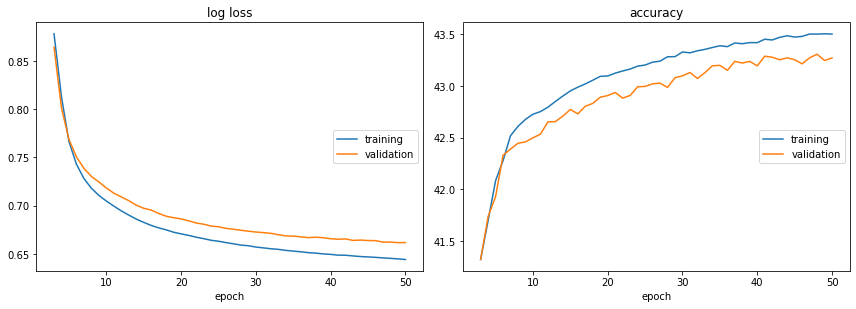

log loss:
training   (min:    0.644, max:    1.755, cur:    0.644)
validation (min:    0.662, max:    0.998, cur:    0.662)

accuracy:
training   (min:   38.152, max:   43.506, cur:   43.503)
validation (min:   40.667, max:   43.308, cur:   43.272)


In [ ]:
modelG1 = GenerativeLSTM(embedding_size=5, hidden_size=16)
optimizer = optim.Adam(modelG1.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

train_model_gener(modelG1, criterion, optimizer, num_epochs=50)

#Hyperparameter tuning

## Liczba parametrów (features) w warstwie hidden, tzn hiddeh_size. Poprzednie wartości parametrów były dla krótszego słownika i długości nazwy. Dlatego zwiększamy

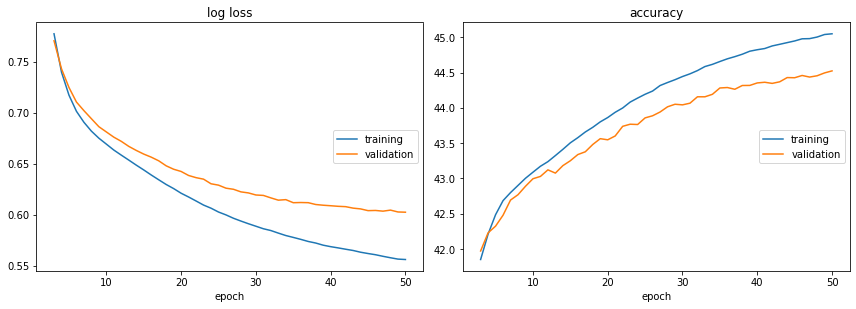

log loss:
training   (min:    0.556, max:    1.346, cur:    0.556)
validation (min:    0.602, max:    0.937, cur:    0.602)

accuracy:
training   (min:   40.188, max:   45.049, cur:   45.049)
validation (min:   40.812, max:   44.523, cur:   44.523)


In [ ]:
modelG2 = GenerativeLSTM(embedding_size=5, hidden_size=55)
optimizer = optim.Adam(modelG2.parameters(), lr=0.01) #lr
criterion = nn.CrossEntropyLoss()

train_model_gener(modelG2, criterion, optimizer, num_epochs=50)

## Accuracy rośnie i loss spada, jednak nadal obserwujemy overfitting. Zwiększam liczbę warstw i dodaję dropout.

## Model_versionA + layers + dropout

In [ ]:
class GenerativeLSTM_A(nn.Module):
    def __init__(self, embedding_size, hidden_size,layers_num,dropout_prob,bidirectional_if):
        super().__init__()
        dictionary_len = len(char2id) + 2
        self.emb = nn.Embedding(dictionary_len, embedding_size)
        self.lstm = nn.LSTM(input_size=embedding_size, hidden_size=hidden_size,num_layers=layers_num, dropout=dropout_prob, bidirectional=bidirectional_if)
        # note: input size is the numer of channels/embedding dim, NOT length
        self.fc = nn.Linear(hidden_size, dictionary_len)

    def forward(self, x):
        x = self.emb(x)
        x = x.permute(1, 0, 2)  # BLC -> LBC
        output, (hidden, cell) = self.lstm(x)
        res = self.fc(output)
        return res.permute(1, 2, 0) #  LBC -> BCL

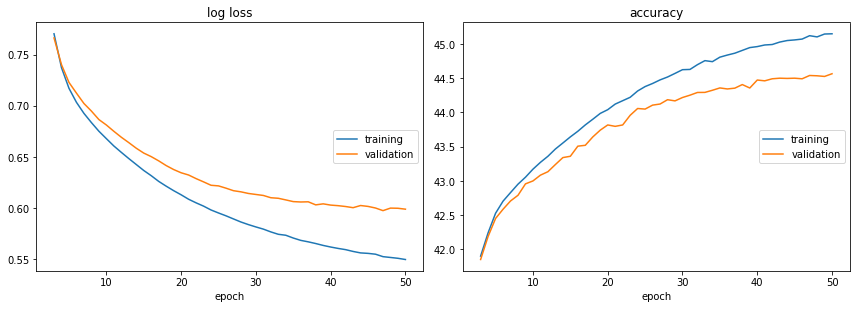

log loss:
training   (min:    0.549, max:    1.343, cur:    0.549)
validation (min:    0.597, max:    0.933, cur:    0.599)

accuracy:
training   (min:   39.697, max:   45.146, cur:   45.146)
validation (min:   41.016, max:   44.563, cur:   44.563)


In [ ]:
modelG3 = GenerativeLSTM_A(embedding_size=5, hidden_size=55,layers_num =1,dropout_prob=0.2,bidirectional_if=False) # hidden_size
optimizer = optim.Adam(modelG3.parameters(), lr=0.01) 
criterion = nn.CrossEntropyLoss()

train_model_gener(modelG3, criterion, optimizer, num_epochs=50)

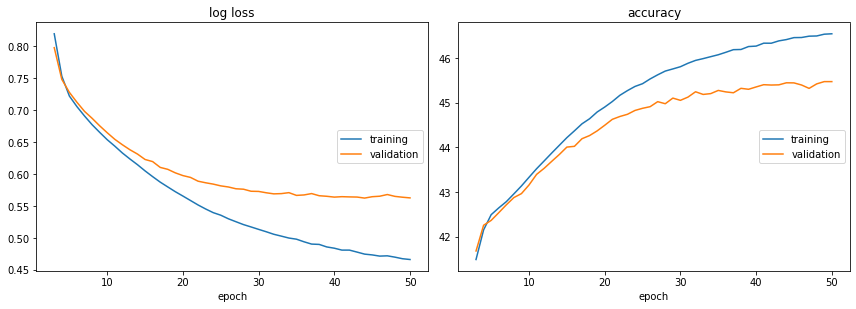

log loss:
training   (min:    0.466, max:    1.415, cur:    0.466)
validation (min:    0.562, max:    0.959, cur:    0.563)

accuracy:
training   (min:   40.160, max:   46.542, cur:   46.542)
validation (min:   40.908, max:   45.471, cur:   45.471)


In [ ]:
modelG4 = GenerativeLSTM_A(embedding_size=5, hidden_size=55,layers_num =2,dropout_prob=0,bidirectional_if=False) # hidden_size
optimizer = optim.Adam(modelG4.parameters(), lr=0.01) 
criterion = nn.CrossEntropyLoss()

train_model_gener(modelG4, criterion, optimizer, num_epochs=50)

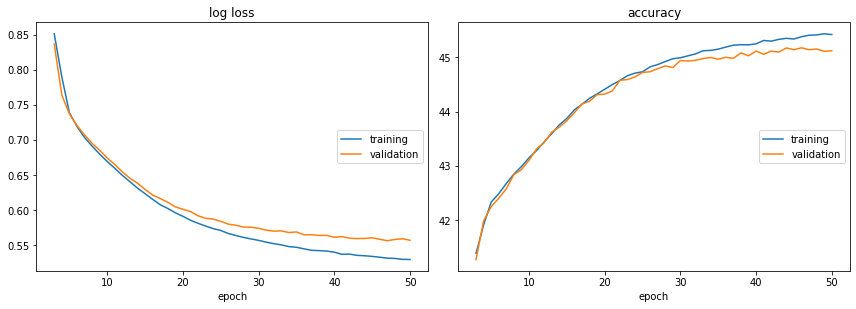

log loss:
training   (min:    0.529, max:    1.417, cur:    0.529)
validation (min:    0.556, max:    0.964, cur:    0.557)

accuracy:
training   (min:   40.237, max:   45.437, cur:   45.423)
validation (min:   40.939, max:   45.178, cur:   45.124)


In [ ]:
modelG5 = GenerativeLSTM_A(embedding_size=5, hidden_size=55,layers_num =2,dropout_prob=0.2,bidirectional_if=False) # hidden_size
optimizer = optim.Adam(modelG5.parameters(), lr=0.01) 
criterion = nn.CrossEntropyLoss()

train_model_gener(modelG5, criterion, optimizer, num_epochs=50)

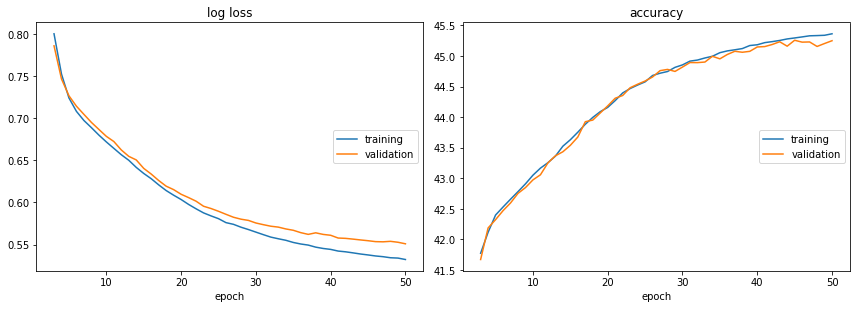

log loss:
training   (min:    0.532, max:    1.291, cur:    0.532)
validation (min:    0.551, max:    0.925, cur:    0.551)

accuracy:
training   (min:   40.151, max:   45.364, cur:   45.364)
validation (min:   40.988, max:   45.258, cur:   45.251)


In [ ]:
modelG6 = GenerativeLSTM_A(embedding_size=5, hidden_size=55,layers_num =3,dropout_prob=0.15,bidirectional_if=False) # the best
optimizer = optim.Adam(modelG6.parameters(), lr=0.01) 
criterion = nn.CrossEntropyLoss()

train_model_gener(modelG6, criterion, optimizer, num_epochs=50)

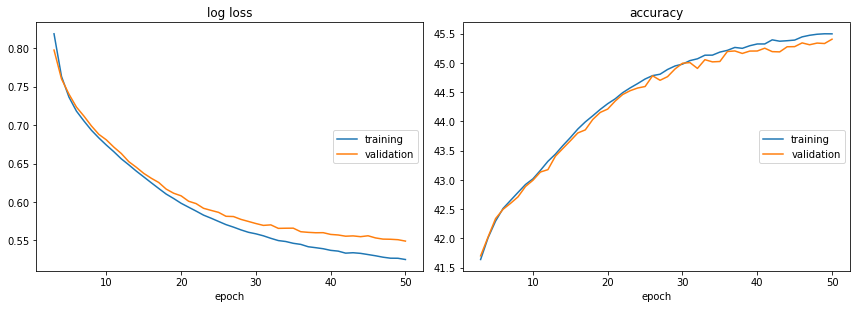

log loss:
training   (min:    0.525, max:    1.413, cur:    0.525)
validation (min:    0.549, max:    0.971, cur:    0.549)

accuracy:
training   (min:   40.241, max:   45.499, cur:   45.498)
validation (min:   40.978, max:   45.407, cur:   45.407)


In [ ]:
modelG7 = GenerativeLSTM_A(embedding_size=5, hidden_size=65,layers_num =2,dropout_prob=0.3,bidirectional_if=False) # hidden_size
optimizer = optim.Adam(modelG7.parameters(), lr=0.01) 
criterion = nn.CrossEntropyLoss()

train_model_gener(modelG7, criterion, optimizer, num_epochs=50)

## Komentarz1. Jako **Final model** (przy ograniczonym czasie) wybieram *modelG7*. Główny kierunek: poglębiam sieć (liczba parametrów i liczba warst; features & layers), ale nie dopuszczam overfitting (dropout). Warty uwagi i inne parametry: learning rate, loss function, inicalizacja wag, parameters for optimizer i etc.

# Funkcje, która wypisuje nazwę leku 

## preparation

In [ ]:
def encode(name, end=True):
    code = [char2id[c] for c in name]
    if end:
        return torch.tensor([BEGIN_ID] + code + [AFTER_ID]).unsqueeze(0)
    else:
        return torch.tensor([BEGIN_ID] + code).unsqueeze(0)

In [ ]:
encode("Ibu")

tensor([[91, 34, 15, 13, 92]])

In [ ]:
encode("Idu", end=False)

tensor([[91, 34,  4, 13]])

In [ ]:
pred = modelG7(encode("Idu", end=False).to(device))
pred.size()

torch.Size([1, 93, 4])

In [ ]:
pred

tensor([[[  5.7142,  -2.1157,  -4.7571,  -5.5104],
         [  2.0462,   2.2218,   4.9964,   0.1883],
         [ -2.5236,   2.3451,   3.7564,   3.6419],
         [ -0.9983,   0.1307,   3.9912,   1.6740],
         [ -3.4969,   3.0148,   3.0275,   3.1654],
         [ -0.0253,   4.8812,   4.2944,   4.3967],
         [  0.4243,   6.4930,   2.9160,   4.0678],
         [ -1.5192,  -0.7474,   3.8006,   2.1404],
         [ -1.9644,   2.8289,   1.3250,   4.2445],
         [ -1.2041,  -0.0216,   1.3697,   1.2745],
         [ -3.1984,   1.4711,   5.4639,   2.0422],
         [  6.2612,  -0.8434,  -0.6680,  -1.2674],
         [ -0.4239,   4.8219,   2.2104,   4.1915],
         [  0.7329,   3.6092,   4.9494,   2.1368],
         [  5.8463,  -1.6113,  -2.5455,  -3.3882],
         [  2.2499,   6.2074,   2.7181,   3.0221],
         [  6.6152,  -0.9136,  -1.1753,  -4.0463],
         [  6.3584,   1.1972,  -2.8505,  -3.3847],
         [ -0.6964,   1.8194,  -0.7215,   1.8435],
         [ -0.1301,   3.2036,  

In [ ]:
pred[0,:,-1].softmax(dim=0)

tensor([3.9493e-06, 1.1789e-03, 3.7267e-02, 5.2079e-03, 2.3141e-02, 7.9276e-02,
        5.7055e-02, 8.3031e-03, 6.8079e-02, 3.4927e-03, 7.5265e-03, 2.7495e-04,
        6.4565e-02, 8.2730e-03, 3.2977e-05, 2.0052e-02, 1.7075e-05, 3.3092e-05,
        6.1698e-03, 5.3529e-02, 2.3244e-05, 2.8513e-01, 9.5742e-05, 9.2701e-02,
        3.8017e-03, 2.0251e-02, 4.9529e-04, 1.2219e-02, 6.6793e-07, 3.0042e-07,
        1.0569e-01, 5.6701e-04, 6.8936e-04, 3.7784e-05, 5.2705e-06, 7.6254e-04,
        8.2987e-05, 4.9707e-06, 3.2516e-04, 5.2751e-04, 1.9070e-07, 2.5920e-03,
        1.0583e-06, 2.4322e-02, 4.2859e-04, 3.4029e-08, 1.3802e-04, 1.1445e-04,
        2.9918e-06, 2.3439e-04, 7.9975e-07, 5.5125e-06, 1.1664e-05, 3.9823e-06,
        1.0645e-05, 3.4077e-03, 3.3790e-06, 1.2669e-05, 5.4501e-08, 1.2410e-04,
        8.7836e-07, 1.2185e-06, 4.9781e-05, 1.5711e-07, 7.7416e-07, 6.5928e-04,
        2.0400e-04, 6.9319e-07, 2.1877e-06, 1.3433e-05, 6.7586e-09, 1.3611e-07,
        6.1067e-07, 1.1213e-07, 1.0534e-

In [ ]:
next_letter_prob = pred[0,:,-1].softmax(dim=0).cpu().detach().numpy()
next_letter_prob

array([3.9492711e-06, 1.1788728e-03, 3.7266754e-02, 5.2078879e-03,
       2.3140877e-02, 7.9275742e-02, 5.7055488e-02, 8.3031310e-03,
       6.8078920e-02, 3.4926997e-03, 7.5264773e-03, 2.7495457e-04,
       6.4564534e-02, 8.2730316e-03, 3.2976521e-05, 2.0051694e-02,
       1.7075476e-05, 3.3092205e-05, 6.1697685e-03, 5.3528707e-02,
       2.3244003e-05, 2.8513071e-01, 9.5741503e-05, 9.2701025e-02,
       3.8016932e-03, 2.0250620e-02, 4.9528887e-04, 1.2219225e-02,
       6.6792580e-07, 3.0041645e-07, 1.0568628e-01, 5.6701305e-04,
       6.8935589e-04, 3.7783764e-05, 5.2705350e-06, 7.6254108e-04,
       8.2987375e-05, 4.9707346e-06, 3.2515731e-04, 5.2750664e-04,
       1.9069753e-07, 2.5919846e-03, 1.0583458e-06, 2.4321534e-02,
       4.2858793e-04, 3.4029423e-08, 1.3802345e-04, 1.1444625e-04,
       2.9918206e-06, 2.3438715e-04, 7.9975109e-07, 5.5124965e-06,
       1.1664124e-05, 3.9822730e-06, 1.0644845e-05, 3.4077121e-03,
       3.3790152e-06, 1.2668957e-05, 5.4500660e-08, 1.2409613e

In [ ]:
if 'f' not in char2id:
  print('not in char2id')
else: 
  print('in char2id')

in char2id


In [ ]:
if '<' not in char2id: # sprawdzam, czy jest używany ten znak
  print('not in char2id')
else: 
  print('in char2id')

not in char2id


In [ ]:
if '>' not in char2id: # sprawdzam, czy jest używany ten znak
  print('not in char2id')
else: 
  print('in char2id')

not in char2id


In [ ]:
chars = [c for i, c in id2char.items()] + [">", "<"]

In [ ]:
chars

['Z',
 'o',
 'l',
 'e',
 'd',
 'r',
 'n',
 'i',
 'c',
 ' ',
 'a',
 'F',
 's',
 'u',
 'K',
 'b',
 'E',
 'N',
 'g',
 't',
 'D',
 'p',
 'A',
 'm',
 'z',
 'k',
 'P',
 'x',
 '1',
 '%',
 'v',
 'T',
 'w',
 'B',
 'I',
 'S',
 'R',
 'X',
 'y',
 'H',
 'U',
 'h',
 'J',
 'f',
 'C',
 '0',
 'L',
 'G',
 '2',
 'V',
 '5',
 'ó',
 'O',
 'W',
 '.',
 '-',
 'Q',
 ',',
 '8',
 'M',
 '7',
 'ę',
 'ż',
 '(',
 ')',
 'q',
 'j',
 'ń',
 '3',
 'ś',
 'ć',
 '4',
 '9',
 '6',
 '+',
 'ą',
 'Y',
 'Ł',
 'ł',
 '/',
 '^',
 'ź',
 ':',
 'Ś',
 'Ż',
 '"',
 ';',
 '°',
 '&',
 '–',
 'µ',
 '>',
 '<']

In [ ]:
100 * pd.Series(next_letter_prob, index=chars).sort_values(ascending=False)

p    2.851307e+01
v    1.056863e+01
m    9.270103e+00
r    7.927574e+00
c    6.807892e+00
         ...     
0    3.402942e-06
ą    3.271442e-06
:    1.284234e-06
ć    6.758603e-07
°    5.468797e-07
Length: 93, dtype: float32

In [ ]:
next_char_id = np.random.choice(len(next_letter_prob), 1, p=next_letter_prob)[0]
next_char_id

12

In [ ]:
chars[next_char_id]

't'

## funkcja v1

In [ ]:
def generate(start="", next_chars=55, model=modelG7, temperature=1.):
    word = start

    for i in range(next_chars):
        pred = model(encode(word, end=False).to(device))
        next_letter_prob = pred[0,:,-1].softmax(dim=0).cpu().detach().numpy()
  
        next_letter_prob = next_letter_prob**(1/temperature)
        next_letter_prob = next_letter_prob / next_letter_prob.sum()

        next_char_id = np.random.choice(len(next_letter_prob), 1, p=next_letter_prob)[0]

        word += chars[next_char_id]

        if chars[next_char_id] == '<':
            break

    return word

In [ ]:
generate(model=modelG7)

'ClooFarm<'

## funkcja v2 (bez "<", ">")

In [ ]:
def generate2(start="", next_chars=55, model=modelG7, temperature=1.):
    word = start

    for i in range(next_chars):
        pred = model(encode(word, end=False).to(device))
        next_letter_prob = pred[0,:,-1].softmax(dim=0).cpu().detach().numpy()
  
        next_letter_prob = next_letter_prob**(1/temperature)
        next_letter_prob = next_letter_prob / next_letter_prob.sum()

        next_char_id = np.random.choice(len(next_letter_prob), 1, p=next_letter_prob)[0]

        word += chars[next_char_id]

        if chars[next_char_id] == '<':
            break

    return (word.replace('<', '')).replace('>', '')

In [ ]:
generate2(start="", next_chars=55, model=modelG7, temperature=1.)

'Cadniacloc Flumamel Lix lrzow'

## Funkcje, która wypisuje nazwę leku i dodatkowo sprawdza czy nie jest już w zbiorze trenginowym

In [ ]:
def generateCHECK(start="", next_chars=55, model=modelG7, temperature=1.):
    word = start

    for i in range(next_chars):
        pred = model(encode(word, end=False).to(device))
        next_letter_prob = pred[0,:,-1].softmax(dim=0).cpu().detach().numpy()
  
        next_letter_prob = next_letter_prob**(1/temperature)
        next_letter_prob = next_letter_prob / next_letter_prob.sum()

        next_char_id = np.random.choice(len(next_letter_prob), 1, p=next_letter_prob)[0]

        word += chars[next_char_id]

        if chars[next_char_id] == '<':
            break

    word1 = (word.replace('<', '')).replace('>', '')    
    if word1 in drugsR_df['title_new'].values:
      print(word1, '(istnieje w zbiorze treningowym)')
    else:
      print(word1, '(nie istnieje w zbiorze treningowym)')


In [ ]:
generateCHECK("",55,modelG7,temperature=1)

Semberari Alzitino (nie istnieje w zbiorze treningowym)


## examples po 5 dla T=1, T=5 i T=0.2

In [ ]:
for i in range (5):
  print (generateCHECK("",55,modelG7,1))

Eltamedanthit (nie istnieje w zbiorze treningowym)
None
Ketosil PR  (nie istnieje w zbiorze treningowym)
None
Tranctavest Clasen (nie istnieje w zbiorze treningowym)
None
Tridetal DGPAC (nie istnieje w zbiorze treningowym)
None
Carvitram  Inułiki (nie istnieje w zbiorze treningowym)
None


In [ ]:
for i in range (5):
  print (generateCHECK("",55,modelG7,5))

G 3Egi -qTLIU- (nie istnieje w zbiorze treningowym)
None
ndvqEKHmYB (nie istnieje w zbiorze treningowym)
None
Hg+Trt7RGDC.N (nie istnieje w zbiorze treningowym)
None
FxUDef4DCyQ50+LK63Eą0 (nie istnieje w zbiorze treningowym)
None
rmz9–7nOlUAj8oisgiqQ Ph (nie istnieje w zbiorze treningowym)
None


In [ ]:
for i in range (5):
  print (generateCHECK("",55,modelG7,0.2))

Alpirin (nie istnieje w zbiorze treningowym)
None
Prostolin (nie istnieje w zbiorze treningowym)
None
Colmitabine Actavis (nie istnieje w zbiorze treningowym)
None
Simvastatin Teva (nie istnieje w zbiorze treningowym)
None
Prosto-Saston (nie istnieje w zbiorze treningowym)
None


# Funkcję, która dla stringa zwraca *jakąś* miarę prawdopodobności stringa jako nazwy leku 



## Mój pomysł: Jako miarę chcę używać model, który będzie zwracaj prawdopodobieństwo, że ten string to nazwa leku. Dlatego buduję RNN model: dane= nazwy wygenerowane i prawdziwe, label = fake or real.

## przygotowywanie danych

In [ ]:
drugsF = []
for i in range(10000):
  word=generate2(model=modelG7)
  if word not in drugsR_df['title_new'].values:
    drugsF.append(word)
print(drugsF)

['Anelsit', 'Vortar', 'Coltramun gorte', 'Expitir Zisten', 'Stanud', 'Tontroloc DL', 'Kumezeum', 'Raminus R Elsea', 'Emlepiron', 'Alporator Mulo', 'Digricmine Zolt Flea', 'Risterol 50', 'Galmax', 'Riveb', 'Ziglambina', 'Acpafid', 'Seedinair', 'Plentix 35 K 150 mg', 'Sarvilt', 'Derhinax ', 'Boxixed 40', 'Plegamtio', 'Vinatril', 'Zyxo Premze NEUX', 'Confazolic Cumm', 'Acdoepesto 50', 'NioLuray so', 'Metforric 5%', 'Ipirost 300 mg', 'Symmokekam Orenix', 'Domamyl', 'Capecikon', 'Emfromphal 100 mg tabl.u ', 'Lipolosp', 'Maść Gysprznor', 'Cinaval', 'Alloxlor', 'Flucas 1 R', 'Astioden', 'Contray', 'Themflip', 'Rep-Krimit', 'Nopomacil', 'Zovla', 'Acankan', 'Valsedem', 'Marbofil', 'Pascral', 'Po-Cammestan', 'Pysodinet 100 mg/ml/mf', 'Nrorestel', 'Guhrosera', 'Kintalez', 'Priprinta SCT-LAED', 'Tancum 1625 mg roztwór', 'Azomabinex', 'Oxyjet 0,5% Batros', 'Nutrifad 100', 'Opomycone', 'Travobeman', 'Anzefil', 'Tromact', 'Phonilop 55 mg tabletki', 'Simvhanlis Sandoz', 'Ranemizex 120 mg', 'Chlylonex 

In [ ]:
len(drugsF)

9984

In [ ]:
drugsF_df = pd.DataFrame(drugsF, columns=['title_new'])

In [ ]:
drugsF_df.describe()

,title_new
count,9984
unique,9966
top,Marbox
freq,2


In [ ]:
drugsF_df = pd.DataFrame(drugsF_df['title_new'].unique(),columns=['title_new'])

In [ ]:
drugsF_df.describe()

,title_new
count,9966
unique,9966
top,Frals Telm 5
freq,1


In [ ]:
drugsF_df['label']='fake'

In [ ]:
drugsF_df.head(10)

,title_new,label
0,Anelsit,fake
1,Vortar,fake
2,Coltramun gorte,fake
3,Expitir Zisten,fake
4,Stanud,fake
5,Tontroloc DL,fake
6,Kumezeum,fake
7,Raminus R Elsea,fake
8,Emlepiron,fake
9,Alporator Mulo,fake


In [ ]:
drugsF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9966 entries, 0 to 9965
Data columns (total 2 columns):
title_new    9966 non-null object
label        9966 non-null object
dtypes: object(2)
memory usage: 155.8+ KB


In [ ]:
drugsL_df=drugsF_df.append(drugsR_df)

In [ ]:
drugsL_df.head(10)

,title_new,label
0,Anelsit,fake
1,Vortar,fake
2,Coltramun gorte,fake
3,Expitir Zisten,fake
4,Stanud,fake
5,Tontroloc DL,fake
6,Kumezeum,fake
7,Raminus R Elsea,fake
8,Emlepiron,fake
9,Alporator Mulo,fake


In [ ]:
drugsR_df.describe()

,title_new,label
count,9363,9363
unique,9363,1
top,Candesartan HCT Tchaikapharma,real
freq,1,9363


In [ ]:
drugsF_df.describe()

,title_new,label
count,9966,9966
unique,9966,1
top,Frals Telm 5,fake
freq,1,9966


In [ ]:
drugsL_df.describe()

,title_new,label
count,19329,19329
unique,19329,2
top,Broctoshosra 100 mg/ml,fake
freq,1,9966


In [ ]:
lang2id = {lang: i for i, lang in enumerate(drugsL_df['label'].value_counts().index)}
lang2id

{'fake': 0, 'real': 1}

In [ ]:
max_len

55

In [ ]:
X2 = np.zeros((len(drugsL_df), max_len), dtype=np.int64) ###########
X2[:,:] = AFTER_ID
X2[:,0] = BEGIN_ID

Y2 = np.zeros(len(drugsL_df), dtype=np.int64)

In [ ]:
for i, (name, lang) in drugsL_df.iterrows():
    Y2[i] = lang2id[lang]
    for j, c in enumerate(name):
        if j + 1 >= max_len:
            break
        X2[i, j + 1] = char2id[c]

In [ ]:
Y2, Y2.shape

(array([1, 1, 1, ..., 0, 0, 0]), (19329,))

In [ ]:
X2, X2.shape

(array([[91,  0,  1, ..., 92, 92, 92],
        [91, 16,  4, ..., 92, 92, 92],
        [91, 17, 10, ..., 92, 92, 92],
        ...,
        [91, 92, 92, ..., 92, 92, 92],
        [91, 92, 92, ..., 92, 92, 92],
        [91, 92, 92, ..., 92, 92, 92]]), (19329, 55))

## wczytywanie danych

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.25, random_state=42)

In [ ]:
trainloader2 = DataLoader(TensorDataset(torch.from_numpy(X2_train).long(),
                                       torch.from_numpy(Y2_train).long()),
                         batch_size=128, shuffle=True)
testloader2 = DataLoader(TensorDataset(torch.from_numpy(X2_test).long(),
                                      torch.from_numpy(Y2_test).long()),
                         batch_size=128, shuffle=False)


dataloaders2= {
    "train": trainloader2,
    "validation": testloader2
}

## model default

In [ ]:
class RecurrentLSTM(nn.Module):
    def __init__(self, embedding_size, hidden_size):
        super().__init__()
        self.emb = nn.Embedding(len(char2id) + 2, embedding_size)
        self.lstm = nn.LSTM(input_size=embedding_size, hidden_size=hidden_size)
        # note: input size is the numer of channels/embedding dim, NOT length
        self.fc = nn.Linear(hidden_size, len(lang2id))

    def forward(self, x):
        x = self.emb(x)
        x = x.permute(1, 0, 2)  # BLC -> LBC
        output, (hidden, cell) = self.lstm(x)
        res = self.fc(cell).squeeze(0)
        return res

In [ ]:
# train on cuda if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

def train_model(model, criterion, optimizer, num_epochs=10):
    liveloss = PlotLosses()
    model = model.to(device)
    
    for epoch in range(num_epochs):
        logs = {}
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders2[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                _, preds = torch.max(outputs, 1)
                running_loss += loss.detach() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders2[phase].dataset)
            epoch_acc = running_corrects.float() / len(dataloaders2[phase].dataset)
            
            prefix = ''
            if phase == 'validation':
                prefix = 'val_'

            logs[prefix + 'log loss'] = epoch_loss.item()
            logs[prefix + 'accuracy'] = epoch_acc.item()
        
        liveloss.update(logs)
        liveloss.draw()

In [ ]:
X2_example = torch.from_numpy(X2_train[:3]).long().to(device)

In [ ]:
X2_example

tensor([[91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
         92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
         92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
         92],
        [91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
         92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
         92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
         92],
        [91, 44,  2,  1, 21,  7,  4,  7, 27, 92, 92, 92, 92, 92, 92, 92, 92, 92,
         92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
         92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
         92]], device='cuda:0')

In [ ]:
modelR = RecurrentLSTM(embedding_size=5, hidden_size=16).to(device)
modelR

RecurrentLSTM(
  (emb): Embedding(93, 5)
  (lstm): LSTM(5, 16)
  (fc): Linear(in_features=16, out_features=2, bias=True)
)

In [ ]:
modelR(X2_example).size()

torch.Size([3, 2])

## trening i ewaluacja

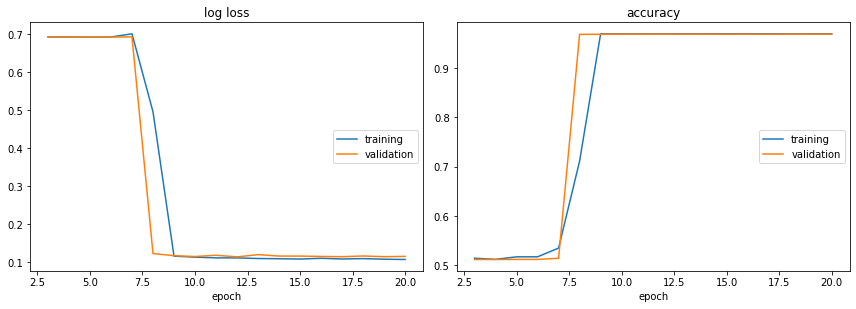

log loss:
training   (min:    0.108, max:    0.701, cur:    0.108)
validation (min:    0.114, max:    0.694, cur:    0.116)

accuracy:
training   (min:    0.504, max:    0.969, cur:    0.969)
validation (min:    0.512, max:    0.968, cur:    0.968)


In [ ]:
modelR1 = RecurrentLSTM(embedding_size=5, hidden_size=16)

optimizer = optim.Adam(modelR1.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

train_model(modelR1, criterion, optimizer, num_epochs=20)

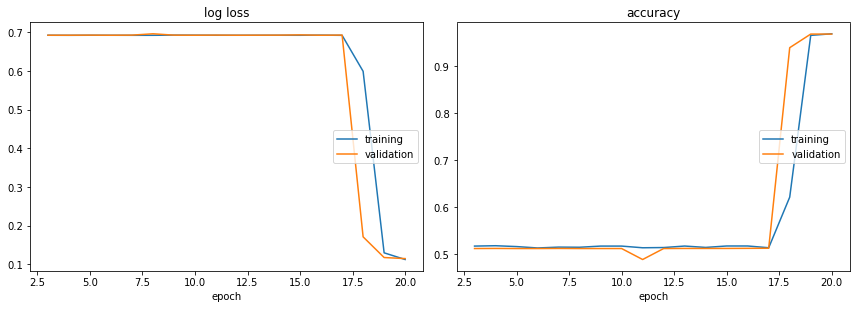

log loss:
training   (min:    0.112, max:    0.695, cur:    0.112)
validation (min:    0.115, max:    0.697, cur:    0.115)

accuracy:
training   (min:    0.508, max:    0.969, cur:    0.969)
validation (min:    0.488, max:    0.968, cur:    0.968)


In [ ]:
modelR2 = RecurrentLSTM(embedding_size=5, hidden_size=55)

optimizer = optim.Adam(modelR2.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

train_model(modelR2, criterion, optimizer, num_epochs=20)

## Komentarz 2. Musiałabym sprawdzić czy architektura odpowiada celu "many to one", potem zrobić hyperparameter tuning. Nie można aktualnych wyników uzywać, ale dalej zaprezentuję jak by to miało być używane.

## Reading between the layers

https://towardsdatascience.com/reading-between-the-layers-lstm-network-7956ad192e58

In [ ]:
dataiter = iter(trainloader2)
x, y = dataiter.next()
x = x.type(torch.LongTensor)
print ('X is', x)
print ('Y is', y)
print ('Shape of X and y are :', x.shape, y.shape)

X is tensor([[91, 36,  1,  ..., 92, 92, 92],
        [91, 92, 92,  ..., 92, 92, 92],
        [91, 46,  1,  ..., 92, 92, 92],
        ...,
        [91, 92, 92,  ..., 92, 92, 92],
        [91, 14,  3,  ..., 92, 92, 92],
        [91, 92, 92,  ..., 92, 92, 92]])
Y is tensor([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0])
Shape of X and y are : torch.Size([128, 55]) torch.Size([128])


In [ ]:
len(lang2id)

2

In [ ]:
embedding_dim=5
embeds = nn.Embedding(len(char2id) + 2, embedding_dim)
print ('Embedding layer is ', embeds)
print ('Embedding layer weights ', embeds.weight.shape)

Embedding layer is  Embedding(93, 5)
Embedding layer weights  torch.Size([93, 5])


In [ ]:
embeds_out = embeds(x)
print ('Embedding layer output shape', embeds_out.shape)
print ('Embedding layer output ', embeds_out)

Embedding layer output shape torch.Size([128, 55, 5])
Embedding layer output  tensor([[[ 0.5520, -0.7024,  3.2907, -0.2127, -0.0545],
         [-0.4006, -2.1275,  0.4451, -0.6748, -0.5968],
         [ 1.1321, -0.4845,  0.1639,  1.3498, -1.8314],
         ...,
         [ 0.8249, -1.3711, -1.3112, -0.4979,  0.2331],
         [ 0.8249, -1.3711, -1.3112, -0.4979,  0.2331],
         [ 0.8249, -1.3711, -1.3112, -0.4979,  0.2331]],

        [[ 0.5520, -0.7024,  3.2907, -0.2127, -0.0545],
         [ 0.6018, -0.6633,  0.1832,  0.0431, -0.4979],
         [-0.7485,  2.1620, -1.2363,  0.7718,  0.5160],
         ...,
         [ 0.8249, -1.3711, -1.3112, -0.4979,  0.2331],
         [ 0.8249, -1.3711, -1.3112, -0.4979,  0.2331],
         [ 0.8249, -1.3711, -1.3112, -0.4979,  0.2331]],

        [[ 0.5520, -0.7024,  3.2907, -0.2127, -0.0545],
         [ 0.2070, -0.0047,  0.0517,  0.3409,  0.7548],
         [-1.0432, -0.7450,  0.7136,  0.8881,  0.3432],
         ...,
         [ 0.8249, -1.3711, -1.3112,

In [ ]:
# initializing the hidden state to 0
hidden=None
lstm = nn.LSTM(input_size=embedding_dim, hidden_size=16, num_layers=2, batch_first=True)
lstm_out, h = lstm(embeds_out, hidden)
print ('LSTM layer output shape', lstm_out.shape)
print ('LSTM layer output ', lstm_out)

LSTM layer output shape torch.Size([128, 55, 16])
LSTM layer output  tensor([[[ 0.0356, -0.0315, -0.0768,  ..., -0.0022, -0.0124,  0.0710],
         [ 0.0938, -0.0370, -0.1158,  ...,  0.0284, -0.0450,  0.1336],
         [ 0.0760, -0.0517, -0.1392,  ...,  0.0251, -0.0297,  0.1539],
         ...,
         [ 0.0996, -0.0601, -0.1691,  ...,  0.0089, -0.1149,  0.2682],
         [ 0.0996, -0.0601, -0.1691,  ...,  0.0089, -0.1149,  0.2682],
         [ 0.0996, -0.0601, -0.1692,  ...,  0.0088, -0.1149,  0.2682]],

        [[ 0.0356, -0.0315, -0.0768,  ..., -0.0022, -0.0124,  0.0710],
         [ 0.0617, -0.0446, -0.1145,  ...,  0.0135, -0.0223,  0.1213],
         [ 0.0651, -0.0517, -0.1328,  ...,  0.0181, -0.0166,  0.1500],
         ...,
         [ 0.0996, -0.0601, -0.1692,  ...,  0.0088, -0.1149,  0.2682],
         [ 0.0996, -0.0601, -0.1692,  ...,  0.0088, -0.1149,  0.2682],
         [ 0.0996, -0.0601, -0.1692,  ...,  0.0088, -0.1149,  0.2682]],

        [[ 0.0356, -0.0315, -0.0768,  ..., -0.0

In [ ]:
fc = nn.Linear(in_features=16, out_features=1)
fc_out = fc(lstm_out.contiguous().view(-1, 16))
print ('FC layer output shape', fc_out.shape)
print ('FC layer output ', fc_out)

FC layer output shape torch.Size([7040, 1])
FC layer output  tensor([[-0.2064],
        [-0.1912],
        [-0.1572],
        ...,
        [-0.1053],
        [-0.1053],
        [-0.1053]], grad_fn=<AddmmBackward>)


In [ ]:
fc = nn.Linear(in_features=16, out_features=2)
fc_out = fc(lstm_out.contiguous().view(-1, 16))
print ('FC layer output shape', fc_out.shape)
print ('FC layer output ', fc_out)

FC layer output shape torch.Size([7040, 2])
FC layer output  tensor([[0.0008, 0.0249],
        [0.0291, 0.0381],
        [0.0695, 0.0906],
        ...,
        [0.0719, 0.0338],
        [0.0719, 0.0338],
        [0.0719, 0.0338]], grad_fn=<AddmmBackward>)


## preparation

In [ ]:
pred = modelR2(encode("Biomagnal", end=False).to(device))
pred.size

<function Tensor.size>

In [ ]:
pred.softmax(dim=1)

tensor([[0.6978, 0.3022]], device='cuda:0', grad_fn=<SoftmaxBackward>)

In [ ]:
pred1 = modelR2(encode("Sascvdda sqa", end=False).to(device))
pred1.size

<function Tensor.size>

In [ ]:
pred1.softmax(dim=1).cpu()

tensor([[0.0615, 0.9385]], grad_fn=<CopyBackwards>)

In [ ]:
pred2 = modelR2(encode("Paracetamol", end=False).to(device))
pred2.size

<function Tensor.size>

In [ ]:
pred2.softmax(dim=1).cpu()

tensor([[0.7626, 0.2374]], grad_fn=<CopyBackwards>)

In [ ]:
modelR2(encode("Paracetamol", end=False).to(device)).softmax(dim=1).cpu().detach().numpy()

array([[0.7626306 , 0.23736942]], dtype=float32)

# Final function - generuje nazwę leku, sprawdza czy jest ona w zbiorze treningowym i  zwraca miarę prawdopodobności stringa jako nazwy leku

In [ ]:
def GenerateRate(start="", next_chars=55, model=modelG7, temperature=1.,model2=modelR2):
  word =generate2(start="", next_chars=55, model=modelG7, temperature=1.)
  pred =model2(encode(word, end=False).to(device)).softmax(dim=1).cpu().detach().numpy()[0,1]
  print('Prawdopodobieństwo, że -',word,'-to nazwa leku',round(100*pred,2), '%')
  if word in drugsR_df['title_new'].values:
    print('Istnieje w zbiorze treningowym')
  else:
    print('Nie istnieje w zbiorze treningowym')

In [ ]:
GenerateRate("",55,modelG7,1,modelR2)

Prawdopodobieństwo, że - Zinp Kowienoria -to nazwa leku 91.18 %
Nie istnieje w zbiorze treningowym
